In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 3.1

In [2]:
dic1={
        "id": ["1", "2", "3", "4", "5"],
        "primer_nombre": ["Alex", "Amy", "Valentina", "Alice", "Lina"], 
        "apellido": ["Anderson", "Ruales", "Marin", "Barbosa", "Robles"]}

dic2={
        "id": ["4", "5", "6", "7", "8"],
        "primer_nombre": ["Luis", "Brian", "Mariana", "Marcela", "Carlos"], 
        "apellido": ["Ruiz", "Giralgo", "Ortegon", "Palacios", "Gallego"]}

dic3={
        "id": ["1", "2", "3", "4", "5", "7", "8", "9", "10", "11"],
        "test_id": [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

df1=pd.DataFrame(dic1)
df2=pd.DataFrame(dic2)
df3=pd.DataFrame(dic3)

In [6]:
dfrow=pd.concat([df1,df2],axis=1)
dfrow

id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego

In [7]:
dfcolumn=pd.concat([df1,df2],axis=0)
dfcolumn

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

In [8]:
dfmerge=pd.merge(pd.merge(df1, df2, on="id", how="outer"), df3, on="id", how="outer")
dfmerge

id primer_nombre_x apellido_x primer_nombre_y apellido_y  test_id
0    1            Alex   Anderson             NaN        NaN     51.0
1    2             Amy     Ruales             NaN        NaN     15.0
2    3       Valentina      Marin             NaN        NaN     15.0
3    4           Alice    Barbosa            Luis       Ruiz     61.0
4    5            Lina     Robles           Brian    Giralgo     16.0
5    6             NaN        NaN         Mariana    Ortegon      NaN
6    7             NaN        NaN         Marcela   Palacios     14.0
7    8             NaN        NaN          Carlos    Gallego     15.0
8    9             NaN        NaN             NaN        NaN      1.0
9   10             NaN        NaN             NaN        NaN     61.0
10  11             NaN        NaN             NaN        NaN     16.0

In [9]:
dfsameid=pd.merge(pd.merge(df1,df2,on="id",how="inner"),df3,on="id",how="inner")
dfsameid

id primer_nombre_x apellido_x primer_nombre_y apellido_y  test_id
0  4           Alice    Barbosa            Luis       Ruiz       61
1  5            Lina     Robles           Brian    Giralgo       16

# 3.2

In [10]:
df=pd.read_csv("datos_alcohol.txt")
df

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0    Afghanistan                  0                0               0   
1        Albania                 89              132              54   
2        Algeria                 25                0              14   
3        Andorra                245              138             312   
4         Angola                217               57              45   
..           ...                ...              ...             ...   
188    Venezuela                333              100               3   
189      Vietnam                111                2               1   
190        Yemen                  6                0               0   
191       Zambia                 32               19               4   
192     Zimbabwe                 64               18               4   

     litros_totales_de_alcohol_puro continente  
0                               0.0         AS  
1                               4.9         EU  
2                               0.7         AF  
3                              12.4         EU  
4                               5.9         AF  
..                              ...        ...  
188                             7.7         SA  
189                             2.0         AS  
190                             0.1         AS  
191                             2.5         AF  
192                             4.7         AF  

[193 rows x 6 columns]

In [11]:
Pcerveza = df.groupby("continente")["porciones_cerveza"].mean()
MPcerveza = Pcerveza.idxmax()
print("El continente que más bebe cerveza es",MPcerveza)

El continente que más bebe cerveza es EU


Análisis estadístico del consumo de vino:
count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: porciones_vino, dtype: float64


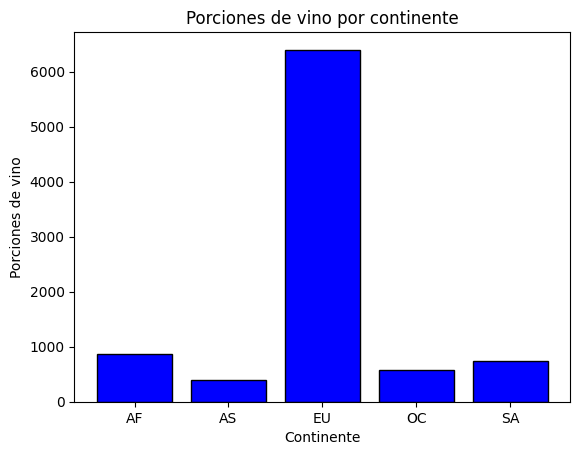

In [12]:
print("Análisis estadístico del consumo de vino:")
print(df.porciones_vino.describe(include="all"))
vino= df.groupby("continente")["porciones_vino"].sum()
plt.bar(vino.index,vino.values,color="blue",edgecolor="black")
plt.xlabel("Continente")
plt.ylabel("Porciones de vino")
plt.title("Porciones de vino por continente")
plt.show()

In [13]:
print(df.groupby("continente")["porciones_licor"].agg(["mean", "min", "max"]))

                  mean  min  max
continente                      
AF           16.339623    0  152
AS           60.840909    0  326
EU          132.555556    0  373
OC           58.437500    0  254
SA          114.750000   25  302


In [14]:
df_numeric = df.select_dtypes(include="number")
df_numeric["continente"] = df["continente"]
consumo_medio_por_continente = df_numeric.groupby("continente").mean()
print(consumo_medio_por_continente)

            porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333  


# 3.3

In [15]:
visualizacion=pd.read_csv("visualizacion.txt")
visualizacion=visualizacion.drop(columns=["Unnamed: 0"])
visualizacion

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

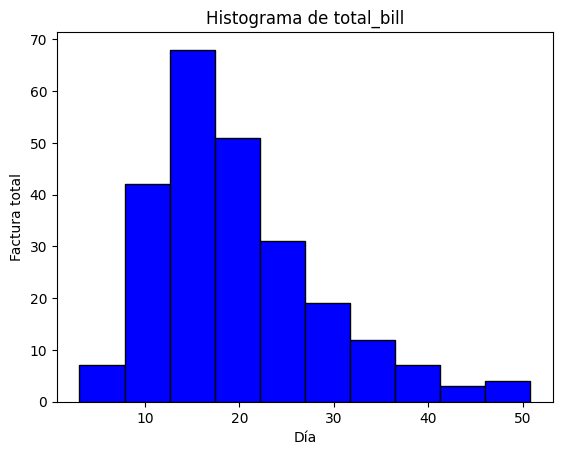

In [22]:
plt.hist(visualizacion["total_bill"],color="blue",edgecolor="black",bins=10)
plt.title("Histograma de total_bill")
plt.xlabel("Día")
plt.ylabel("Factura total")
plt.show()

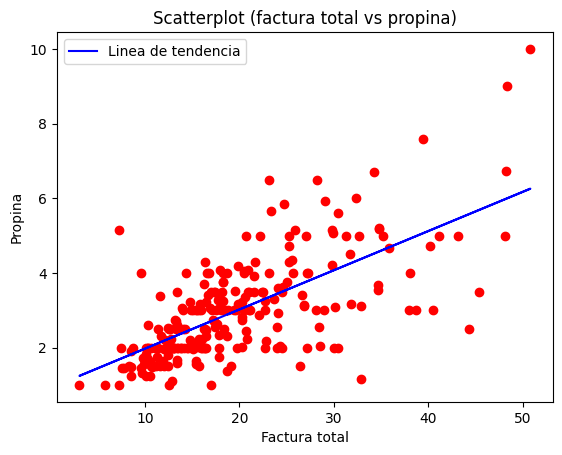

In [21]:
plt.scatter(visualizacion["total_bill"], visualizacion["tip"],color="red")
plt.xlabel("Factura total")
plt.ylabel("Propina")
plt.title("Scatterplot (factura total vs propina)")
z=np.polyfit(visualizacion["total_bill"], visualizacion["tip"], 1)
p=np.poly1d(z)
plt.plot(visualizacion["total_bill"],p(visualizacion["total_bill"]),color="blue",label="Linea de tendencia")
plt.legend()
plt.show()

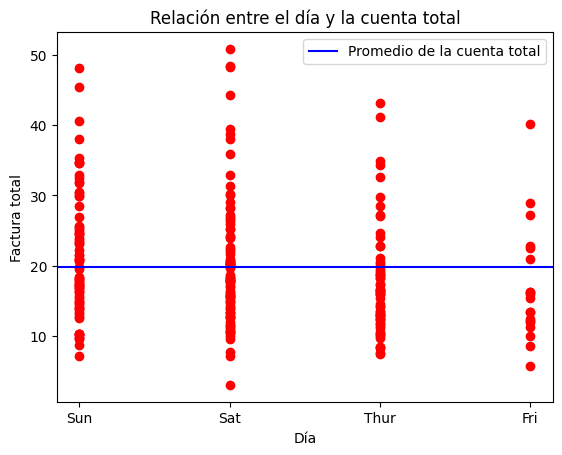

In [20]:
plt.scatter(visualizacion["day"], visualizacion["total_bill"],color="red")
plt.axhline(visualizacion["total_bill"].mean(),color="blue",label="Promedio de la cuenta total")
plt.xlabel("Día")
plt.ylabel("Factura total")
plt.title("Relación entre el día y la cuenta total")
plt.legend()
plt.show()